# 初始化

In [25]:
import yaml
import numpy as np

with open('./controller_config.yaml', 'r', encoding='utf-8') as f:
    result = yaml.load(f.read(), Loader=yaml.FullLoader)
# result['camera_matrix']
# print(result)
print(result['camera_matrix'])
print(np.matrix(result['camera_matrix']))

import cv2
import cv2.aruco as aruco
parameters = aruco.DetectorParameters_create()
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_100)
# camera_matrix =np.matrix ([[ 522.1905267183170736, 0.0000000000000000, 308.8532705794233948  ],
#                   [ 0.0000000000000000, 522.8166355728753842, 234.2130798407917496 ],
#                   [ 0.0000000000000000, 0.0000000000000000, 1.0000000000000000 ]])
# # camera_matrix = [[1000, 0, 320], [0, 1000, 240], [0, 0, 1]]  # 示例相机矩阵
# camera_dist = np.matrix([ 0.1058497356483027 ,-0.1488874492570700 ,0.0000000000000000 ,0.0000000000000000 ,-0.8698561798572152])

camera_matrix = np.matrix(result['camera_matrix'])
camera_dist = np.matrix(result['camera_dist'], dtype=np.float32)
  # marker_length: 0.012
marker_length = 0.005
# parameters

[[1543.40965, 0.0, 979.342817], [0.0, 1541.34379, 513.776013], [0.0, 0.0, 1.0]]
[[1.54340965e+03 0.00000000e+00 9.79342817e+02]
 [0.00000000e+00 1.54134379e+03 5.13776013e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


# 查看相机序号

In [22]:
for i in range(0, 8):
    cap = cv2.VideoCapture(i)
    # cap.set(3,1920) #设置分辨率
    # cap.set(4,1080)
    if cap.isOpened():
        print( 'camera open')
        while True:
            ret, img = cap.read()
            print(ret)
            if not ret:
                continue
            else:
                print(ret, "camera id:", i)
                print(img.shape)
            #

                cv2.imshow('5', img)
                # cv2.resizeWindow('5', 800, 600)  # 将窗口大小调整为 800x600
                # cv2.waitKey(10)
                c = cv2.waitKey(10)
                if c == 27:
                        break
                cap.set(cv2.CAP_PROP_FPS, 330)
                # cv2.destroyAllWindows()
    cap.release()
    cv2.destroyAllWindows()
    # break

camera open
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(480, 640, 3)
True
True camera id: 0
(48

# 读取aruco码位姿

In [ ]:
import cv2
import time
import cv2.aruco as aruco
from scipy.spatial.transform import Rotation as R

# 创建视频捕捉对象，0 表示使用默认摄像头
cap = cv2.VideoCapture(0)
cap.set(3,1920) #设置分辨率
cap.set(4,1080)

# 创建 ArUco 检测参数
parameters = aruco.DetectorParameters_create()

# 加载预定义的 ArUco 字典
# aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_250)
i = 0
while True:
    # 读取一帧图像
    # time.sleep(1)
    ret, frame = cap.read()

    if not ret:
        break

    # 将图像转换为灰度图
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 检测 ArUco 标记
    camera_dist = np.matrix([-4.23139210e-03,  8.76011612e-02,  2.61323850e-03, -7.60543561e-04, 0])
    corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    rvecs, tvecs, _ = aruco.estimatePoseSingleMarkers(corners,
                                                          marker_length,
                                                          camera_matrix,
                                                          camera_dist)
    
    # 估计标记的姿态
    rvecs, tvecs, _ = aruco.estimatePoseSingleMarkers(corners, marker_length, camera_matrix, camera_dist)

    # 检查返回值
    if rvecs is not None and len(rvecs) > 0:
        print("Rotation Vectors:", rvecs)
        # Rotation Vectors: [[[-3.12682862  0.03934772  0.00940102]]]
        print("Translation Vectors:", tvecs)
        # Translation Vectors: [[[0.00055413 0.00014394 0.02618797]]]
        
        # 处理第一个标记的旋转向量
        rr = R.from_rotvec(rvecs[0][0])
        print("Rotation Matrix:\n", rr.as_matrix())
         # [[ 0.99966529 -0.02520588 -0.00582934]
         # [-0.02511868 -0.9995782   0.01457627]
         # [-0.00619429 -0.01442496 -0.99987677]]
    
        # 获取欧拉角（以度为单位）
        rpy = rr.as_euler('xyz', degrees=True)

    
        # 打印欧拉角
        print("Euler Angles (before adjustment):", rpy)
        # Euler Angles (before adjustment): [-179.17346597    0.35490888   -1.4393736 ]
    
        # 确保 rpy 是一个数组并且长度为 3
        if rpy.shape == (3,):
            rpy[-1] = rpy[-1] + 360 * (rpy[-1] < 0)
            rpy[0] = rpy[0] + 360 * (rpy[0] < 0)
            print("Euler Angles (after adjustment):", rpy)
            # Euler Angles (after adjustment): [1.80826534e+02 3.54908876e-01 3.58560626e+02]
            
            # 检查 tvecs[0][0] 是否有效
            if tvecs is not None and len(tvecs) > 0:
                print("Translation Vector (in mm):", tvecs[0][0] * 1000)
                # 将平移向量转换为毫米并合并
                back = np.concatenate((tvecs[0][0] * 1000, rpy))
                print("Final Vector:", back)
 #                Final Vector: [5.54131605e-01 1.43942161e-01 2.61879730e+01 1.80826534e+02
 # 3.54908876e-01 3.58560626e+02]
            else:
                print("Translation vector is None or empty.")
        else:
            print("Unexpected shape for Euler angles:", rpy.shape)
    else:
        print("未检测到任何标记或估计姿态失败")


    # 如果检测到标记，绘制边框并显示 ID
    if ids is not None:
        frame = aruco.drawDetectedMarkers(frame, corners, ids)
        # cv2.drawFrameAxes(frame, camera_matrix, camera_dist, rvecs[i], tvecs[i], 0.1)
        # print('corners:',i, corners)

    # 显示结果图像
    cv2.imshow('Aruco Detection', frame)

    # 按下 '' 键退出
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 释放视频捕捉对象并关闭所有窗口
cap.release()
cv2.destroyAllWindows()

# 图像矫正

In [ ]:
def undistort_image(img, camera_matrix, dist_coeffs):
    """
    对图像进行去畸变处理，并确保输出图像与输入图像大小相同
    """
    h, w = img.shape[:2]
    
    # 优化相机矩阵
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(
        camera_matrix, 
        dist_coeffs, 
        (w,h), 
        alpha=1,  # 使用1可以保留所有像素
        newImgSize=(w,h)
    )
    
    # 去畸变
    dst = cv2.undistort(img, camera_matrix, dist_coeffs, None, newcameramtx)
    
    # 不进行ROI裁剪，保持原始尺寸
    return dst

# 主程序
cap = cv2.VideoCapture(0)
cap.set(3,1920) #设置分辨率
cap.set(4,1080)
# # camera_dist = np.matrix([-0.015640236127494, 0.166401022297676, 0.002232772571308, -2.762115518982536e-04, 0])
# camera_dist = np.matrix([-4.23139210e-03,  18.76011612e-02,  2.61323850e-03, -7.60543561e-04, 0])

# frame = cv2.imread('./cam1-aruco/1.jpg')

# # 执行校正
# undistorted = undistort_image(frame, camera_matrix, camera_dist)

# # 确保两张图片尺寸相同
# h, w = frame.shape[:2]
# undistorted = cv2.resize(undistorted, (w, h))

# # 现在可以安全地水平拼接
# combined = np.hstack((frame, undistorted))

# # 显示
# cv2.imshow('Original vs Undistorted', combined)
# cv2.imshow('Original', frame)
# cv2.imshow('Undistorted', undistorted)

while True:
    ret, frame = cap.read()
    print(frame.shape)
    if not ret:
        break
        
    # 执行校正
    undistorted = undistort_image(frame, camera_matrix, camera_dist)
    
    # 确保两张图片尺寸相同
    h, w = frame.shape[:2]
    undistorted = cv2.resize(undistorted, (w, h))
    
    # 现在可以安全地水平拼接
    combined = np.hstack((frame, undistorted))
    
    # 显示
    cv2.imshow('Original vs Undistorted', combined)
    cv2.imshow('Original', frame)
    cv2.imshow('Undistorted', undistorted)
    
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [27]:
import cv2
import numpy as np
import glob
import os

def process_images(folder_path):
    """
    处理指定文件夹中的图片
    
    参数：
    folder_path: 图片文件夹路径
    """
    # 确保路径存在
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"找不到路径：{folder_path}")
    if not os.path.exists(folder_path + '/undistorted'):
        raise FileNotFoundError(f"找不到路径：{folder_path + '/undistorted'}")
    
    # 获取所有jpg图片
    image_paths = glob.glob(os.path.join(folder_path, '*.jpg'))
    
    if not image_paths:
        print(f"在 {folder_path} 中没有找到jpg图片")
        return
    
    for image_path in image_paths:
        try:
            # 读取图片
            frame = cv2.imread(image_path)
            
            if frame is None:
                print(f"无法读取图片：{image_path}")
                continue
                
            # 在这里处理图片
            undistorted = undistort_image(frame, camera_matrix, camera_dist)
            
            # 显示原图和处理后的图片
            h, w = frame.shape[:2]
            # undistorted = cv2.resize(undistorted, (w, h))
            combined = np.hstack((frame, undistorted))
            
            # 显示图片
            # cv2.imshow('Original vs Undistorted', combined)
            
            # 保存结果
            output_path = os.path.join(
                folder_path, 'undistorted',
                'undistorted_' + os.path.basename(image_path)
            )
            cv2.imwrite(output_path, undistorted)
            output_path2 = os.path.join(
                folder_path, 'undistorted',
                'combined_' + os.path.basename(image_path)
            )
            cv2.imwrite(output_path2, combined)
            
            # 等待按键
            key = cv2.waitKey(0) & 0xFF
            if key == ord('q'):
                break
                
        except Exception as e:
            print(f"处理图片 {image_path} 时出错：{str(e)}")
            continue
    
    cv2.destroyAllWindows()

# 使用示例
try:
    folder_path = './cam1-aruco'  # 图片文件夹路径
    os.makedirs(folder_path + '/undistorted', exist_ok=True)
    camera_dist = np.matrix( [0.0522575014850949,	-0.353834933819654, 0.00197535440320868,	0.00128091948470123, 0 ] )
    process_images(folder_path)
except Exception as e:
    print(f"程序出错：{str(e)}")

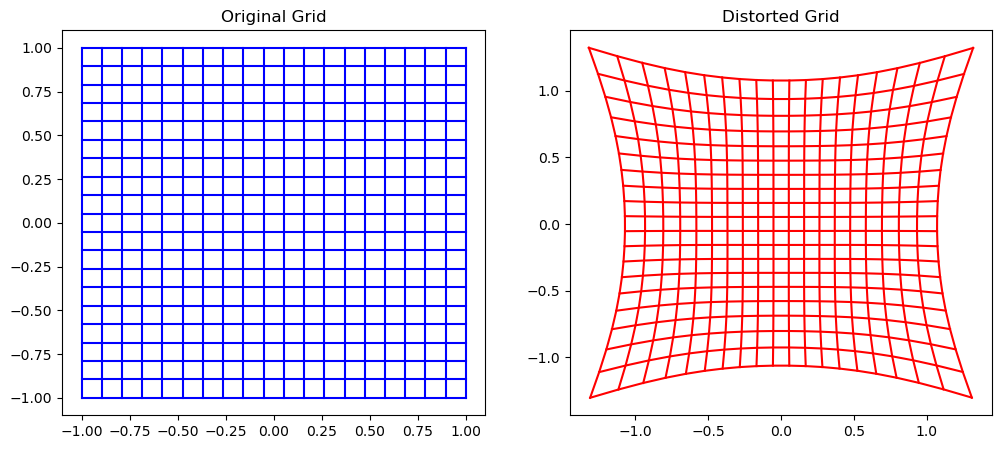

In [30]:
import matplotlib.pyplot as plt
import numpy as np

k1 = -0.015640236  # 较小的负值，表示轻微的桶形畸变
k2 = 0.086401022   # 正值，用于修正高阶畸变
# k2 = 0.166401022   # 正值，用于修正高阶畸变
p1 = 0.002232773   # 接近0，表示切向畸变很小
p2 = -0.000276212  # 接近0，表示切向畸变很小
# k3 = -1.234355939  # 高阶径向畸变修正
k3 = 0

def plot_distortion_effect():
    """绘制畸变效果示意图"""
    # 创建网格点
    x = np.linspace(-1, 1, 20)
    y = np.linspace(-1, 1, 20)
    # x = np.linspace(0, 1960, 1)
    # y = np.linspace(-1, 1080, 1)
    X, Y = np.meshgrid(x, y)
    
    # 计算畸变
    r2 = X**2 + Y**2
    r4 = r2**2
    r6 = r2**3
    k1 = -0.015640236
    
    Xd = X * (1 + k1*r2 + k2 * r4 + k3 * r6) + 2*p1*X*Y + p2*(r2 + 2*X**2)
    Yd = Y * (1 + k1*r2 + k2 * r4 + k3 * r6) + p1*(r2 + 2*Y**2) + 2*p2*X*Y
    
    # 绘制对比图
    plt.figure(figsize=(12, 5))
    
    plt.subplot(121)
    plt.plot(X, Y, 'b')
    plt.plot(X.T, Y.T, 'b')
    plt.title('Original Grid')
    
    plt.subplot(122)
    plt.plot(Xd, Yd, 'r')
    plt.plot(Xd.T, Yd.T, 'r')
    plt.title('Distorted Grid')
    
    plt.show()

plot_distortion_effect()